# Mathias's Workbook for the Time Series Project Using the Superstore Dataset 

In [1]:
# Import for data manipulation
import pandas as pd
import numpy as np

# Import for data viz
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib.ticker import StrMethodFormatter
from matplotlib.dates import DateFormatter

# Import for acquisition
import env
import os
import mathias_wrangle as mw

# Add for setting to see all rows and columns
pd.options.display.max_rows = None
pd.options.display.max_columns = None

# Import to ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Acquire

In [2]:
# # Create URL to pull data
# url = env.get_db_url('superstore_db')
# # Create SQL pull
# ssdb = pd.read_sql('''
# SELECT *
# FROM orders
# JOIN categories
# USING(`Category ID`)
# JOIN customers
# USING(`Customer ID`)
# JOIN products
# USING(`Product ID`)
# JOIN regions
# USING(`Region ID`)
# ''', url)

# # Save to CSV
# ssdb.to_csv('ssdb.csv')

In [3]:
# # Create function to pull data
# def get_superstore(use_cache=True):
    
#     '''
#     This functions recieves a boolean as input to see if the user wants to recieve a fresh copy from the database.
#     Then the fucntion checks to see if the file being requested already exists.
#     Runs a query for the data using the assigned url.
#     Creates a new csv if needed.
#     Then returns the superstore dataframe.
#     '''
    
#     # Check for previously saved version
#     filename = 'ssdb.csv'
#     if os.path.exists(filename) and use_cache:
#         return pd.read_csv(filename)
    
#     # Notify user of db pull
#     print('Acquiring df')
    
#     # Create URL to pull data
#     url = env.get_db_url('superstore_db')
    
#     # Create SQL pull
#     ssdb = pd.read_sql('''
#     SELECT *
#     FROM orders
#     JOIN categories
#     USING(`Category ID`)
#     JOIN customers
#     USING(`Customer ID`)
#     JOIN products
#     USING(`Product ID`)
#     JOIN regions
#     USING(`Region ID`)
#     ''', url)
    
#     # Notify user that df is saving
#     print('Saving CSV')
    
#     # Save file to csv
#     ssdb.to_csv('ssdb.csv')
    
#     # Return df
#     return ssdb

# Prepare

In [4]:
# Try wrangle function
# ssdb = mathias_wrangle.get_superstore(False)

In [5]:
# # Change column names to all lowercase with _ instead of space
# ssdb.columns = [col.lower().replace(' ','_') for col in ssdb]

# # Drop redundant columns
# ssdb = ssdb.drop(columns=['region_id','product_id','category_id','customer_id'],)

# # Set date columns to datetime type
# ssdb.order_date = pd.to_datetime(ssdb.order_date)
# ssdb.ship_date = pd.to_datetime(ssdb.ship_date)

# # Set order date as index
# ssdb = ssdb.set_index('order_date').sort_index()

# # Create column for number of days to ship
# ssdb['days_to_ship'] = ssdb.ship_date - ssdb.index

#     # Set postal code to object type
#     df.postal_code = df.postal_code.astype('object')


In [6]:
# # Create function to prep df
# def prep_superstore(df):
#     '''
#     This function takes in a dataframe and returns it with the following changes.
#     '''
#     # Change column names to all lowercase with _ instead of space
#     df.columns = [col.lower().replace(' ','_') for col in df]

#     # Drop redundant columns
#     df = df.drop(columns=['region_id','product_id','category_id','customer_id'],)

#     # Set date columns to datetime type
#     df.order_date = pd.to_datetime(df.order_date)
#     df.ship_date = pd.to_datetime(df.ship_date)

#     # Set order date as index
#     df = df.set_index('order_date').sort_index()

#     # Set postal code to object type
#     df.postal_code = df.postal_code.astype('object')

#     # Create column for number of days to ship
#     df['days_to_ship'] = df.ship_date - df.index
    
#     # Return df
#     return df

# Split

In [7]:
# Test function
ssdb = mw.prep_superstore(mw.get_superstore())

In [8]:
ssdb.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1734 entries, 2014-01-04 to 2017-12-30
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype          
---  ------         --------------  -----          
 0   order_id       1734 non-null   object         
 1   ship_date      1734 non-null   datetime64[ns] 
 2   ship_mode      1734 non-null   object         
 3   segment        1734 non-null   object         
 4   country        1734 non-null   object         
 5   city           1734 non-null   object         
 6   state          1734 non-null   object         
 7   postal_code    1734 non-null   object         
 8   sales          1734 non-null   float64        
 9   quantity       1734 non-null   float64        
 10  discount       1734 non-null   float64        
 11  profit         1734 non-null   float64        
 12  category       1734 non-null   object         
 13  sub-category   1734 non-null   object         
 14  customer_name  1734 non-null   object 

In [9]:
df = ssdb
train_size = int(len(df) * 0.5)
validate_size = int(len(df) * 0.3)
test_size = int(len(df) - train_size - validate_size)
validate_end_index = train_size + validate_size

train = df[:train_size]
validate = df[train_size:validate_end_index]
test = df[validate_end_index:]

In [10]:
# for col in train.columns:
#     plt.figure(figsize=(13,8))
#     plt.plot(train[col])
#     plt.plot(validate[col])
#     plt.plot(test[col])
#     plt.ylabel(col)
#     plt.title(col)
#     plt.show()

# Explore

## Context

In [11]:
ssdb.head()

,order_id,ship_date,ship_mode,segment,country,city,state,postal_code,sales,quantity,discount,profit,category,sub-category,customer_name,product_name,region_name,days_to_ship
order_date,,,,,,,,,,,,,,,,,,
2014-01-04,CA-2014-112326,2014-01-08,Standard Class,Home Office,United States,Naperville,Illinois,60540.0,11.784,3.0,0.2,4.2717,Office Supplies,Labels,Phillina Ober,Avery 508,Central,4 days
2014-01-04,CA-2014-112326,2014-01-08,Standard Class,Home Office,United States,Naperville,Illinois,60540.0,272.736,3.0,0.2,-64.7748,Office Supplies,Storage,Phillina Ober,SAFCO Boltless Steel Shelving,Central,4 days
2014-01-04,CA-2014-112326,2014-01-08,Standard Class,Home Office,United States,Naperville,Illinois,60540.0,3.540,2.0,0.8,-5.4870,Office Supplies,Binders,Phillina Ober,GBC Standard Plastic Binding Systems Combs,Central,4 days
2014-01-09,CA-2014-135405,2014-01-13,Standard Class,Consumer,United States,Laredo,Texas,78041.0,31.200,3.0,0.2,9.7500,Technology,Accessories,Melanie Seite,Memorex Micro Travel Drive 8 GB,Central,4 days
2014-01-09,CA-2014-135405,2014-01-13,Standard Class,Consumer,United States,Laredo,Texas,78041.0,9.344,2.0,0.2,1.1680,Office Supplies,Art,Melanie Seite,Newell 312,Central,4 days


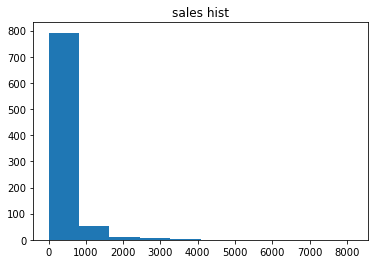

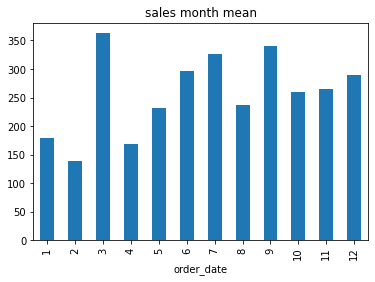

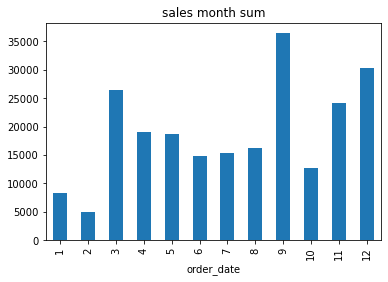

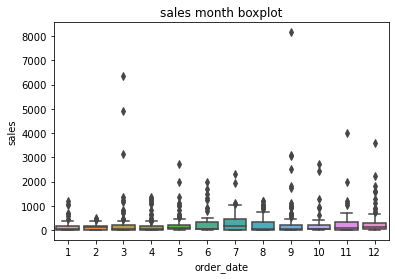

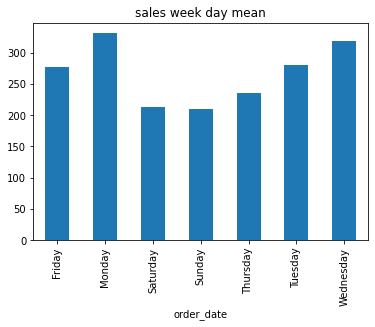

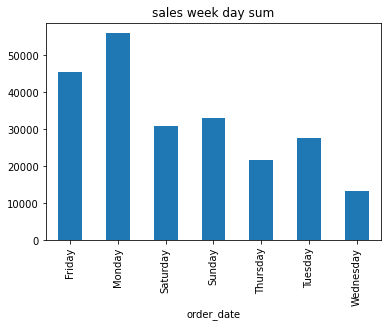

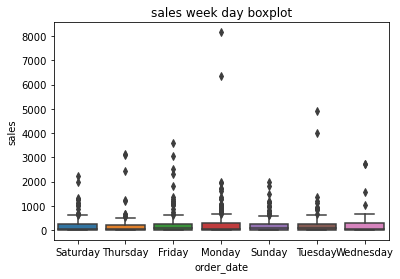

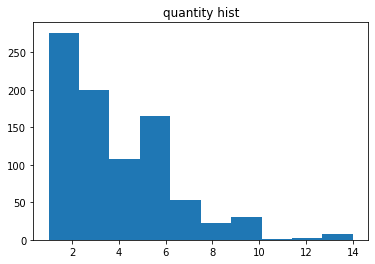

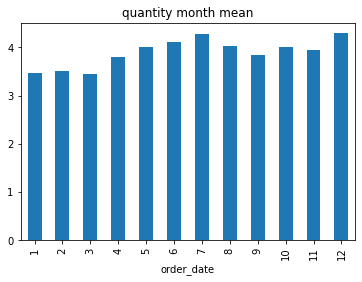

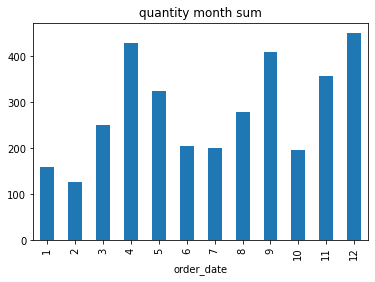

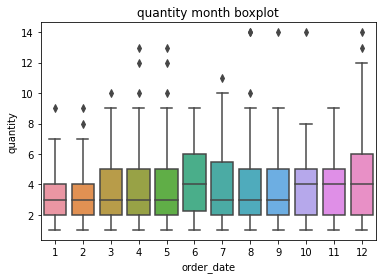

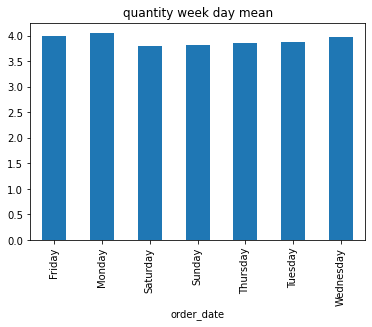

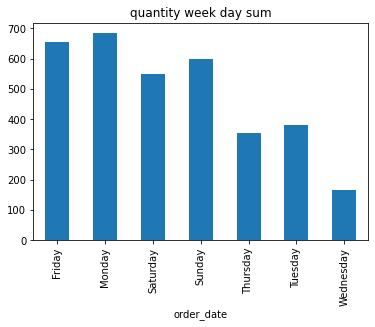

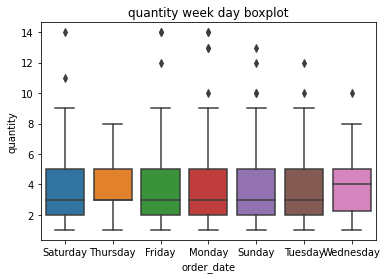

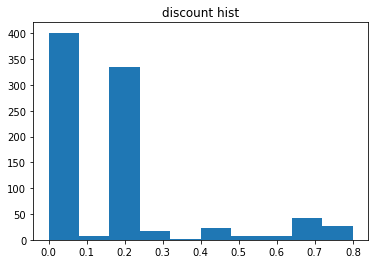

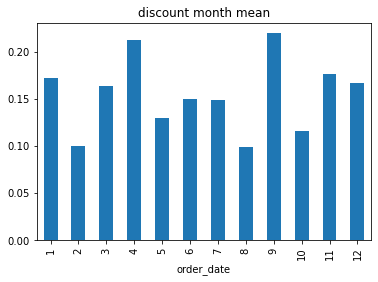

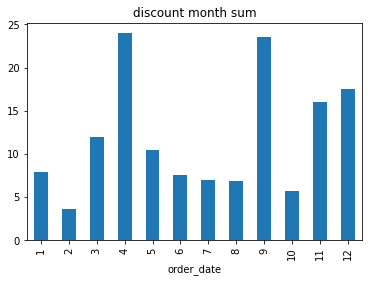

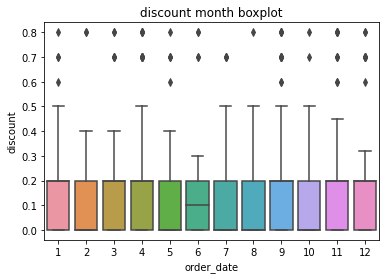

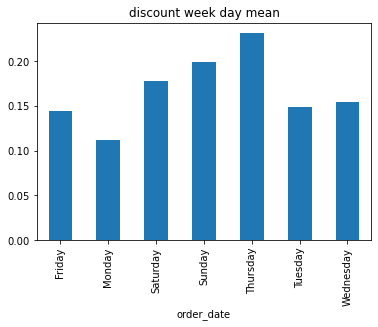

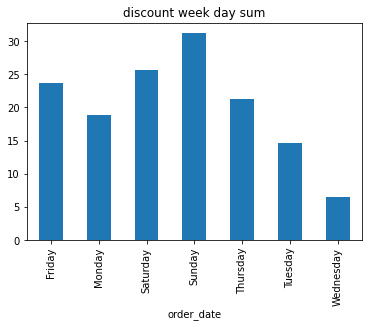

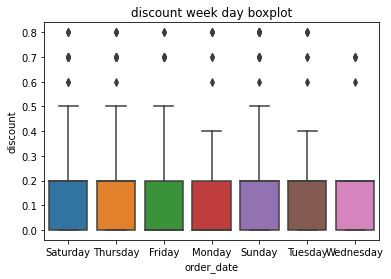

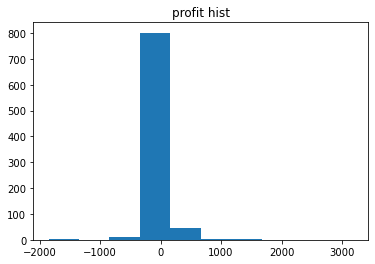

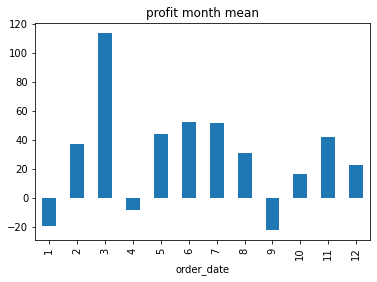

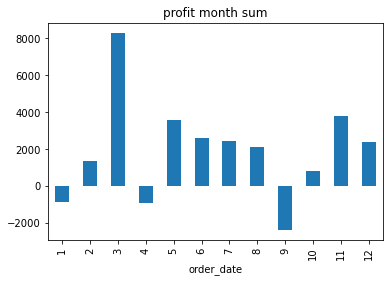

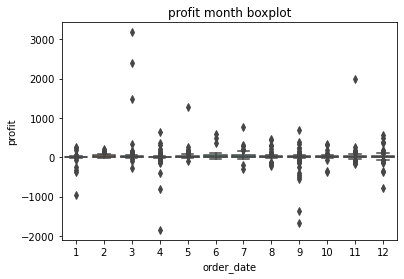

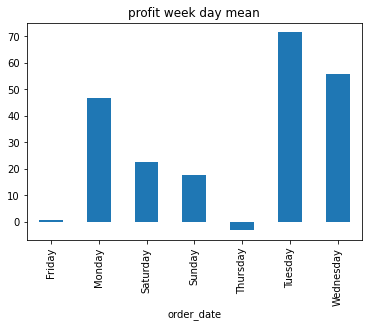

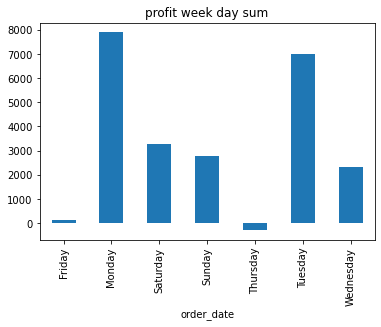

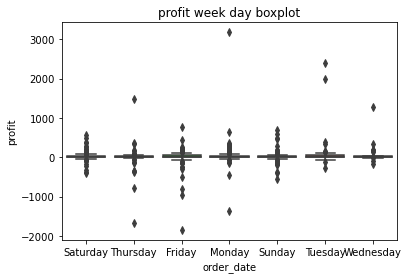

In [12]:
for col in train.columns[train.dtypes == float]:
    plt.hist(train[col])
    plt.title(col +' hist')
    plt.show()
    train.groupby(train.index.month)[col].mean().plot.bar()
    plt.title(col + ' month mean')
    plt.show()
    train.groupby(train.index.month)[col].sum().plot.bar()
    plt.title(col + ' month sum')
    plt.show()
    sns.boxplot(data=train, y=col, x=train.index.month)
    plt.title(col + ' month boxplot')
    plt.show()
    train.groupby(train.index.day_name())[col].mean().plot.bar()
    plt.title(col + ' week day mean')
    plt.show()
    train.groupby(train.index.day_name())[col].sum().plot.bar()
    plt.title(col + ' week day sum')
    plt.show()
    sns.boxplot(data=train, y=col, x=train.index.day_name())
    plt.title(col + ' week day boxplot')
    plt.show()

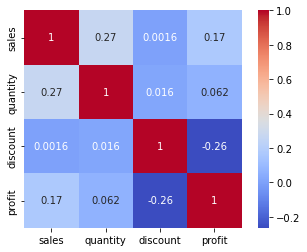

In [13]:
# Perform a Pearson Correlation on the dataset
correlate = ssdb.corr()
sns.heatmap(correlate, annot=True, cmap='coolwarm',square=True)
plt.show()

## discount

In [14]:
ssdb.head()

,order_id,ship_date,ship_mode,segment,country,city,state,postal_code,sales,quantity,discount,profit,category,sub-category,customer_name,product_name,region_name,days_to_ship
order_date,,,,,,,,,,,,,,,,,,
2014-01-04,CA-2014-112326,2014-01-08,Standard Class,Home Office,United States,Naperville,Illinois,60540.0,11.784,3.0,0.2,4.2717,Office Supplies,Labels,Phillina Ober,Avery 508,Central,4 days
2014-01-04,CA-2014-112326,2014-01-08,Standard Class,Home Office,United States,Naperville,Illinois,60540.0,272.736,3.0,0.2,-64.7748,Office Supplies,Storage,Phillina Ober,SAFCO Boltless Steel Shelving,Central,4 days
2014-01-04,CA-2014-112326,2014-01-08,Standard Class,Home Office,United States,Naperville,Illinois,60540.0,3.540,2.0,0.8,-5.4870,Office Supplies,Binders,Phillina Ober,GBC Standard Plastic Binding Systems Combs,Central,4 days
2014-01-09,CA-2014-135405,2014-01-13,Standard Class,Consumer,United States,Laredo,Texas,78041.0,31.200,3.0,0.2,9.7500,Technology,Accessories,Melanie Seite,Memorex Micro Travel Drive 8 GB,Central,4 days
2014-01-09,CA-2014-135405,2014-01-13,Standard Class,Consumer,United States,Laredo,Texas,78041.0,9.344,2.0,0.2,1.1680,Office Supplies,Art,Melanie Seite,Newell 312,Central,4 days


In [15]:
# Counts of days to ship and discounts
#[ssdb['segment'] == 'Consumer'][['category','sub-category','profit','sales']].sort_values(by='profit')

- Discount percentage highest with 0 and 0.2 across all days

## days to ship (might not be relevant)

In [16]:
ssdb.head()

,order_id,ship_date,ship_mode,segment,country,city,state,postal_code,sales,quantity,discount,profit,category,sub-category,customer_name,product_name,region_name,days_to_ship
order_date,,,,,,,,,,,,,,,,,,
2014-01-04,CA-2014-112326,2014-01-08,Standard Class,Home Office,United States,Naperville,Illinois,60540.0,11.784,3.0,0.2,4.2717,Office Supplies,Labels,Phillina Ober,Avery 508,Central,4 days
2014-01-04,CA-2014-112326,2014-01-08,Standard Class,Home Office,United States,Naperville,Illinois,60540.0,272.736,3.0,0.2,-64.7748,Office Supplies,Storage,Phillina Ober,SAFCO Boltless Steel Shelving,Central,4 days
2014-01-04,CA-2014-112326,2014-01-08,Standard Class,Home Office,United States,Naperville,Illinois,60540.0,3.540,2.0,0.8,-5.4870,Office Supplies,Binders,Phillina Ober,GBC Standard Plastic Binding Systems Combs,Central,4 days
2014-01-09,CA-2014-135405,2014-01-13,Standard Class,Consumer,United States,Laredo,Texas,78041.0,31.200,3.0,0.2,9.7500,Technology,Accessories,Melanie Seite,Memorex Micro Travel Drive 8 GB,Central,4 days
2014-01-09,CA-2014-135405,2014-01-13,Standard Class,Consumer,United States,Laredo,Texas,78041.0,9.344,2.0,0.2,1.1680,Office Supplies,Art,Melanie Seite,Newell 312,Central,4 days


In [17]:
# Explore days to ship
ssdb.days_to_ship.value_counts()

4 days    468
5 days    344
2 days    275
6 days    204
3 days    186
7 days    107
1 days     77
0 days     73
Name: days_to_ship, dtype: int64

In [18]:
ssdb[['segment','category','sub-category','days_to_ship']].value_counts()

segment      category         sub-category  days_to_ship
Consumer     Office Supplies  Binders       4 days          37
                                            5 days          29
                              Art           4 days          29
                              Paper         4 days          28
             Furniture        Furnishings   5 days          24
Corporate    Office Supplies  Binders       4 days          23
Consumer     Technology       Phones        5 days          22
             Office Supplies  Storage       4 days          22
                              Paper         5 days          21
             Technology       Phones        4 days          20
             Office Supplies  Paper         6 days          20
Corporate    Office Supplies  Storage       4 days          18
Consumer     Office Supplies  Paper         2 days          18
                              Binders       2 days          17
             Technology       Phones        2 days          1

## Sub-group profits?

In [19]:
# Inspect df
ssdb.head()

,order_id,ship_date,ship_mode,segment,country,city,state,postal_code,sales,quantity,discount,profit,category,sub-category,customer_name,product_name,region_name,days_to_ship
order_date,,,,,,,,,,,,,,,,,,
2014-01-04,CA-2014-112326,2014-01-08,Standard Class,Home Office,United States,Naperville,Illinois,60540.0,11.784,3.0,0.2,4.2717,Office Supplies,Labels,Phillina Ober,Avery 508,Central,4 days
2014-01-04,CA-2014-112326,2014-01-08,Standard Class,Home Office,United States,Naperville,Illinois,60540.0,272.736,3.0,0.2,-64.7748,Office Supplies,Storage,Phillina Ober,SAFCO Boltless Steel Shelving,Central,4 days
2014-01-04,CA-2014-112326,2014-01-08,Standard Class,Home Office,United States,Naperville,Illinois,60540.0,3.540,2.0,0.8,-5.4870,Office Supplies,Binders,Phillina Ober,GBC Standard Plastic Binding Systems Combs,Central,4 days
2014-01-09,CA-2014-135405,2014-01-13,Standard Class,Consumer,United States,Laredo,Texas,78041.0,31.200,3.0,0.2,9.7500,Technology,Accessories,Melanie Seite,Memorex Micro Travel Drive 8 GB,Central,4 days
2014-01-09,CA-2014-135405,2014-01-13,Standard Class,Consumer,United States,Laredo,Texas,78041.0,9.344,2.0,0.2,1.1680,Office Supplies,Art,Melanie Seite,Newell 312,Central,4 days


In [20]:
sub_groups = ssdb.groupby(['segment'])['profit','sales'].mean().sort_values(by=['profit'])
sub_groups

,profit,sales
segment,,
Corporate,14.394660,235.785926
Consumer,21.670237,223.239091
Home Office,34.392304,237.642582


In [21]:
ssdb.groupby(['segment'])['customer_name'].nunique()

segment
Consumer       275
Corporate      154
Home Office     96
Name: customer_name, dtype: int64

In [22]:
sub_groups = ssdb.groupby(['segment'])['profit','sales'].sum().sort_values(by=['profit'])
sub_groups

,profit,sales
segment,,
Corporate,6880.6476,112705.6728
Home Office,10386.4759,71768.0597
Consumer,20673.4058,212970.0929


## Explore Sales, Quantity, Discount, Profit

In [23]:
ssdb.head()

,order_id,ship_date,ship_mode,segment,country,city,state,postal_code,sales,quantity,discount,profit,category,sub-category,customer_name,product_name,region_name,days_to_ship
order_date,,,,,,,,,,,,,,,,,,
2014-01-04,CA-2014-112326,2014-01-08,Standard Class,Home Office,United States,Naperville,Illinois,60540.0,11.784,3.0,0.2,4.2717,Office Supplies,Labels,Phillina Ober,Avery 508,Central,4 days
2014-01-04,CA-2014-112326,2014-01-08,Standard Class,Home Office,United States,Naperville,Illinois,60540.0,272.736,3.0,0.2,-64.7748,Office Supplies,Storage,Phillina Ober,SAFCO Boltless Steel Shelving,Central,4 days
2014-01-04,CA-2014-112326,2014-01-08,Standard Class,Home Office,United States,Naperville,Illinois,60540.0,3.540,2.0,0.8,-5.4870,Office Supplies,Binders,Phillina Ober,GBC Standard Plastic Binding Systems Combs,Central,4 days
2014-01-09,CA-2014-135405,2014-01-13,Standard Class,Consumer,United States,Laredo,Texas,78041.0,31.200,3.0,0.2,9.7500,Technology,Accessories,Melanie Seite,Memorex Micro Travel Drive 8 GB,Central,4 days
2014-01-09,CA-2014-135405,2014-01-13,Standard Class,Consumer,United States,Laredo,Texas,78041.0,9.344,2.0,0.2,1.1680,Office Supplies,Art,Melanie Seite,Newell 312,Central,4 days


<AxesSubplot:xlabel='order_date'>

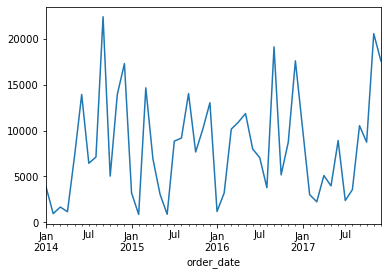

In [24]:
# Explore sales
ssdb['sales'].resample('M').sum().plot()

<AxesSubplot:xlabel='order_date'>

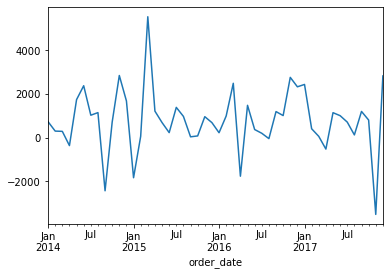

In [25]:
# Explore profit
ssdb['profit'].resample('M').sum().plot()

<AxesSubplot:xlabel='order_date'>

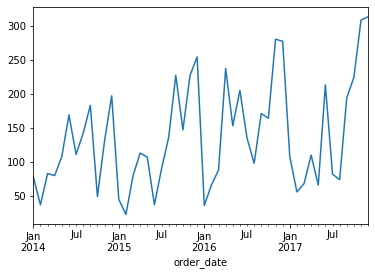

In [26]:
# Explore quantity
ssdb['quantity'].resample('M').sum().plot()

In [53]:
ssdb.sales.sum()

397443.8254

In [27]:
# Compare to product name for cost for all below

# ssdb['simple_cost'] = (ssdb.sales - ssdb.profit) / ssdb.quantity

# ssdb['discount_quantity_cost'] = ((((ssdb.sales * ssdb.discount) + ssdb.sales) - ssdb.profit) / ssdb.quantity)

In [28]:
#ssdb[['product_name','simple_cost']].value_counts().sort_values(ascending=False)

## 

# Segment

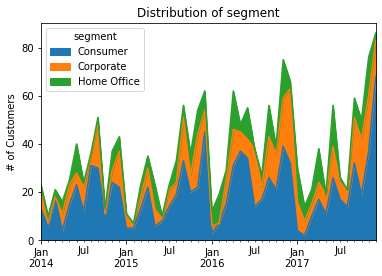

In [29]:
ax = ssdb.groupby('segment').resample('M').size().T.plot.area()
ax.set(title='Distribution of segment', xlabel='', ylabel='# of Customers')
ax.yaxis.set_major_formatter('{:,.0f}'.format)

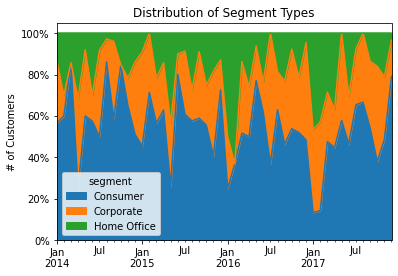

In [30]:
ax = (
    ssdb.groupby("segment")
    .resample("M")
    .size()
    .T.apply(lambda row: row / row.sum(), axis=1)
    .plot.area()
)
ax.set(title='Distribution of Segment Types', xlabel='', ylabel='# of Customers')
ax.yaxis.set_major_formatter(StrMethodFormatter('{x:.0%}'))

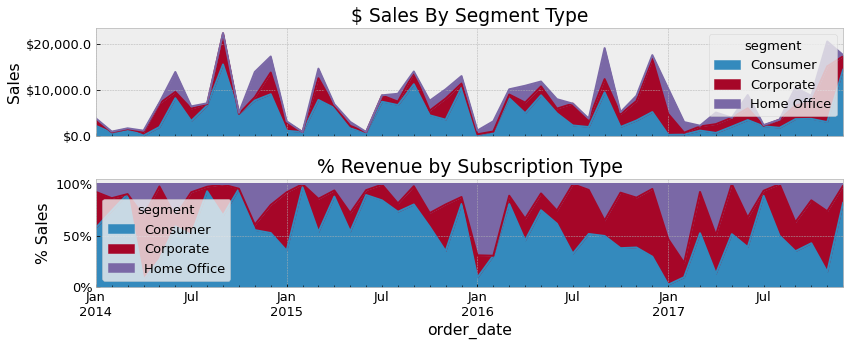

In [63]:
plt.rc('figure', figsize=(12, 5))
plt.rc('font', size=13)
plt.style.use('bmh')

monthly_sales = (
    ssdb[['sales','segment']]
    .groupby('segment')
    .resample('M')
    .sales.sum()
    .unstack(0)
)

fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)

monthly_sales.plot.area(ax=ax1)
ax1.set(title='$ Sales By Segment Type', ylabel='Sales')
ax1.yaxis.set_major_formatter(StrMethodFormatter('${x:,}'))
monthly_sales.apply(lambda row: row / row.sum(), axis=1).plot.area(ax=ax2)
ax2.set(title='% Revenue by Subscription Type', ylabel='% Sales')
ax2.yaxis.set_major_formatter(StrMethodFormatter('{x:.0%}'))
fig.tight_layout()

[Text(0, 0.5, 'Sales'),
 Text(0.5, 1.0, 'Yearly $ Sales By Segment Type'),
 Text(0.5, 0, 'Year')]

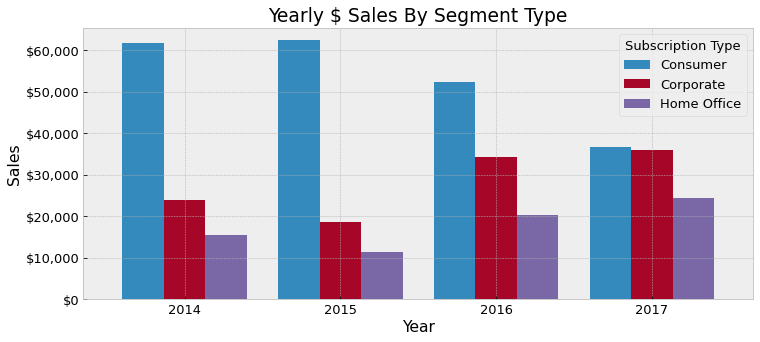

In [64]:
ax = (
    monthly_sales.resample('Y')
    .sum()
    .plot.bar(width=.8)
)
ax.legend(loc='upper right', title='Subscription Type')
ax.yaxis.set_major_formatter(StrMethodFormatter('${x:,.0f}'))
labels = [pd.to_datetime(t.get_text()).strftime('%Y') for t in ax.get_xticklabels()]
ax.set_xticklabels(labels, rotation=0)
ax.set(ylabel='Sales', title='Yearly $ Sales By Segment Type', xlabel='Year')

[Text(0, 0.5, 'Sales'),
 Text(0.5, 1.0, 'Yearly % Sales By Segment Type'),
 Text(0.5, 0, 'Year')]

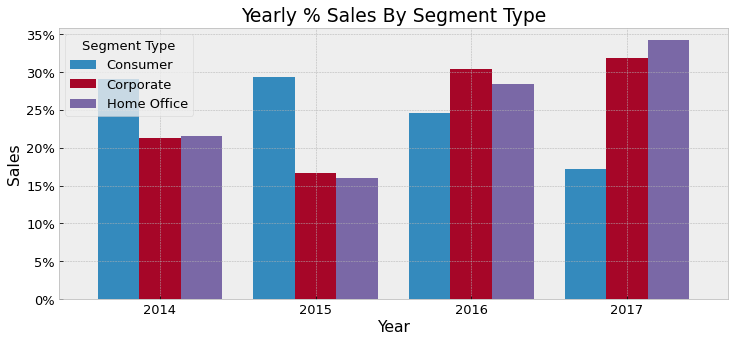

In [65]:
ax = (
    monthly_sales.resample('Y')
    .sum()
    .apply(lambda row: row / row.sum())
    .plot.bar(width=.8)
)
ax.legend(loc='upper left', title='Segment Type')
ax.yaxis.set_major_formatter(StrMethodFormatter('{x:.0%}'))
labels = [pd.to_datetime(t.get_text()).strftime('%Y') for t in ax.get_xticklabels()]
ax.set_xticklabels(labels, rotation=0)
ax.set(ylabel='Sales', title='Yearly % Sales By Segment Type', xlabel='Year')

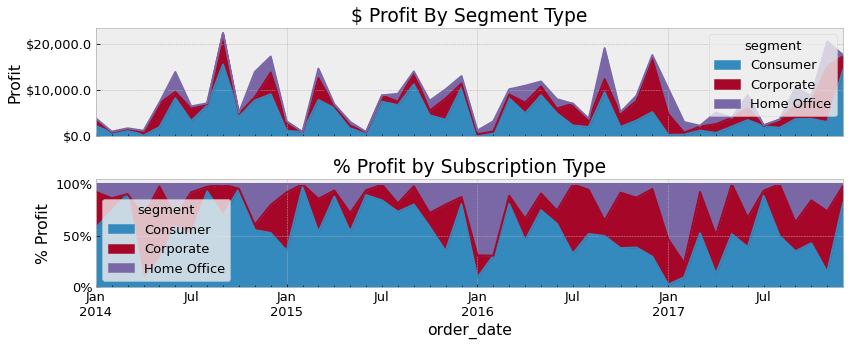

In [69]:
monthly_profit = (
    ssdb[['profit','segment']]
    .groupby('segment')
    .resample('M')
    .profit.sum()
    .unstack(0)
)

fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)

monthly_sales.plot.area(ax=ax1)
ax1.set(title='$ Profit By Segment Type', ylabel='Profit')
ax1.yaxis.set_major_formatter(StrMethodFormatter('${x:,}'))
monthly_sales.apply(lambda row: row / row.sum(), axis=1).plot.area(ax=ax2)
ax2.set(title='% Profit by Subscription Type', ylabel='% Profit')
ax2.yaxis.set_major_formatter(StrMethodFormatter('{x:.0%}'))
fig.tight_layout()

[Text(0, 0.5, 'Profit'),
 Text(0.5, 1.0, 'Yearly $ Profit By segment Type'),
 Text(0.5, 0, 'Year')]

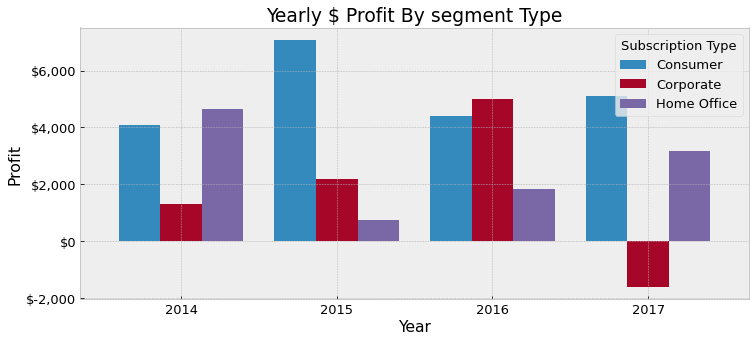

In [70]:
ax = (
    monthly_profit.resample('Y')
    .sum()
    .plot.bar(width=.8)
)
ax.legend(loc='upper right', title='Subscription Type')
ax.yaxis.set_major_formatter(StrMethodFormatter('${x:,.0f}'))
labels = [pd.to_datetime(t.get_text()).strftime('%Y') for t in ax.get_xticklabels()]
ax.set_xticklabels(labels, rotation=0)
ax.set(ylabel='Profit', title='Yearly $ Profit By segment Type', xlabel='Year')

[Text(0, 0.5, 'profit'),
 Text(0.5, 1.0, 'Yearly % profit By Segment Type'),
 Text(0.5, 0, '')]

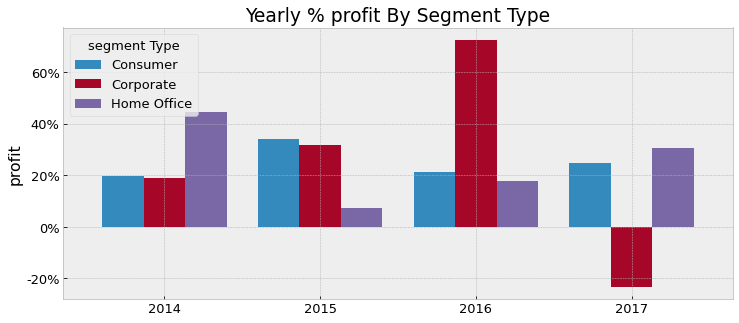

In [68]:
ax = (
    monthly_profit.resample('Y')
    .sum()
    .apply(lambda row: row / row.sum())
    .plot.bar(width=.8)
)
ax.legend(loc='upper left', title='segment Type')
ax.yaxis.set_major_formatter(StrMethodFormatter('{x:.0%}'))
labels = [pd.to_datetime(t.get_text()).strftime('%Y') for t in ax.get_xticklabels()]
ax.set_xticklabels(labels, rotation=0)
ax.set(ylabel='profit', title='Yearly % profit By Segment Type', xlabel='')

In [71]:
ax = (
    sns.barplot(monthly_profit.resample('Y').sum())

)
ax.legend(loc='upper right', title='Subscription Type')
ax.yaxis.set_major_formatter(StrMethodFormatter('${x:,.0f}'))
labels = [pd.to_datetime(t.get_text()).strftime('%Y') for t in ax.get_xticklabels()]
ax.set_xticklabels(labels, rotation=0)
ax.set(ylabel='Profit', title='Yearly $ Profit By segment Type', xlabel='Year')

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [72]:
ssdb[['segment','sales']]

,segment,sales
order_date,,
2014-01-04,Home Office,11.7840
2014-01-04,Home Office,272.7360
2014-01-04,Home Office,3.5400
2014-01-09,Consumer,31.2000
2014-01-09,Consumer,9.3440
2014-01-10,Corporate,2.8900
2014-01-10,Corporate,51.9400
2014-01-11,Consumer,9.9400
2014-01-13,Corporate,11.3600


# TODO
- calculate 
    - floats by product types
    - floats by area(country,region,state,city,postal code)